<a href="https://colab.research.google.com/github/Shaas08/hello-world/blob/master/Chest%20xray%20with%20relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
# upload the Kaggle API
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saswatbanerjee","key":"439dfd87178a90e806f2a7631bd3e6f9"}'}

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia



 99% 2.28G/2.29G [00:29<00:00, 61.3MB/s]
100% 2.29G/2.29G [00:29<00:00, 82.9MB/s]


In [7]:
! unzip chest-xray-pneumonia.zip -d chest-xray-pneumonia

Streaming output truncated to the last 5000 lines.
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0442-

In [9]:
import pandas as pd
import numpy as np

from glob import glob
import cv2
import os

# Define paths to your true and false image folders
true_folder = 'chest-xray-pneumonia/chest_xray/train/NORMAL/'
false_folder = 'chest-xray-pneumonia/chest_xray/train/PNEUMONIA/'

# initialize lists to store images and labels
images = []
labels = []

# load and preprocess true images
for filename in os.listdir(true_folder):
    if filename.endswith('.jpeg'):
        img = cv2.imread(os.path.join(true_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(0)  # 0 represents true

# load and preprocess false images
for filename in os.listdir(false_folder):
    if filename.endswith('.jpeg'):
        img = cv2.imread(os.path.join(false_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(1)  # 1 represents false

# convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)



In [10]:
from sklearn.model_selection import train_test_split
# split the data into trainig and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(2,activation = 'softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
#train the model
history = model.fit(x_train, y_train,epochs=20,batch_size= 32,validation_split=0.2)

Epoch 1/10
105/105 [==============================] - 79s 730ms/step - loss: 38.7106 - accuracy: 0.8466 - val_loss: 0.1608 - val_accuracy: 0.9473
Epoch 2/10
105/105 [==============================] - 89s 847ms/step - loss: 0.1731 - accuracy: 0.9386 - val_loss: 0.2184 - val_accuracy: 0.9341
Epoch 3/10
105/105 [==============================] - 81s 773ms/step - loss: 0.0725 - accuracy: 0.9730 - val_loss: 0.1129 - val_accuracy: 0.9593
Epoch 4/10
105/105 [==============================] - 77s 734ms/step - loss: 0.0374 - accuracy: 0.9868 - val_loss: 0.1453 - val_accuracy: 0.9533
Epoch 5/10
105/105 [==============================] - 72s 685ms/step - loss: 0.0375 - accuracy: 0.9835 - val_loss: 0.1960 - val_accuracy: 0.9569
Epoch 6/10
105/105 [==============================] - 77s 734ms/step - loss: 0.0364 - accuracy: 0.9865 - val_loss: 0.1789 - val_accuracy: 0.9569
Epoch 7/10
105/105 [==============================] - 73s 692ms/step - loss: 0.0689 - accuracy: 0.9775 - val_loss: 0.1928 - val_a

In [13]:
#evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy:{test_acc}')

33/33 - 7s - loss: 0.2501 - accuracy: 0.9579 - 7s/epoch - 225ms/step
Test accuracy:0.9578543901443481


In [14]:
#example:predicting on single image
sample_image = x_test[5]  #replace with your image data
predictions = model.predict(np.expand_dims(sample_image,axis=0))
predicted_label = np.argmax(predictions)

#you can interpret the label using your dataset's class label (0 for false,1 for true)
class_labels= ['true','false']
predicted_class = class_labels[predicted_label]
print(f'Predicted class;  {predicted_class}')

1/1 [==============================] - 0s 136ms/step
Predicted class;  false


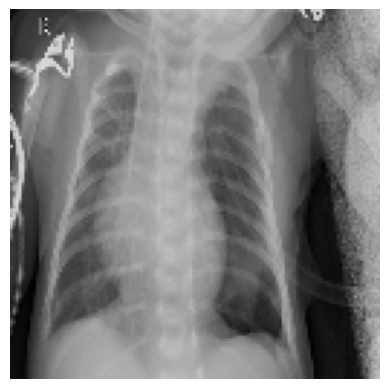

In [15]:
import matplotlib.pyplot as plt

#display the sample image
plt.imshow(sample_image)
plt.axis('off') #turn off axis labels and tick
plt.show()